In [5]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
a = 1+1

In [8]:
a

2

In [2]:
dataset = randn(25)
#manually making a KDE plot

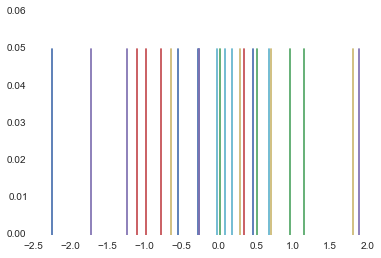

In [3]:
sns.rugplot(dataset)
#shows a tick wherever there's a value

(0, 1)

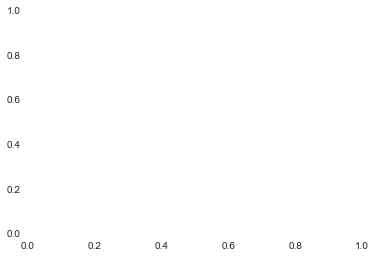

In [4]:
plt.ylim(0,1)

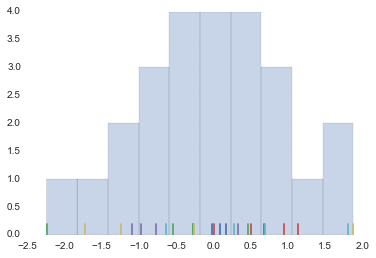

In [11]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

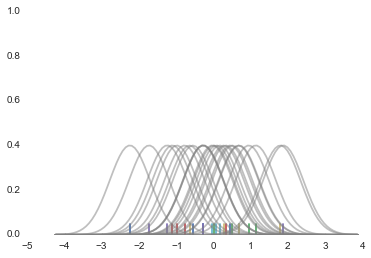

In [14]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)
#linear spacing, start, stop, and number of points

bandwidth = ((4*dataset.std()**5) / (3 * len(dataset)))**0.2
#practical estimation of the bandwidth
             
kernel_list = []
             
for data_point in dataset:
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
             #pdf = probability density function
    kernel_list.append(kernel)
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel, color = 'gray', alpha = 0.5)

plt.ylim(0,1)

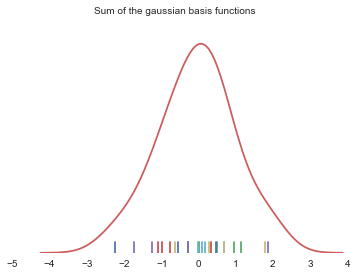

In [16]:
sum_of_kde = np.sum(kernel_list,axis=0)

figure = plt.plot(x_axis,sum_of_kde,color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the gaussian basis functions")

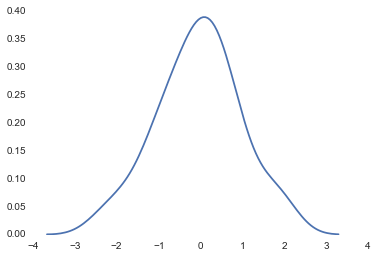

In [17]:
sns.kdeplot(dataset)
#shortcut

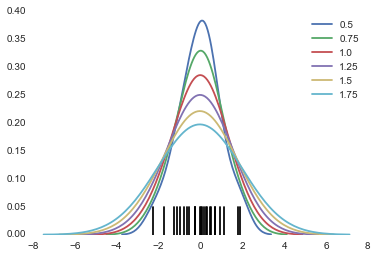

In [19]:
sns.rugplot(dataset,color='black')

for bandwidth in np.arange(0.5,2,0.25):#from 0.5 to 2, in steps of 0.25
    sns.kdeplot(dataset,bw = bandwidth,lw=1.8, label = bandwidth)
    

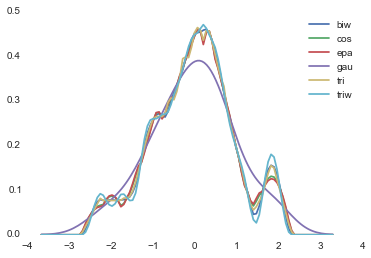

In [20]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel = kern, label=kern)

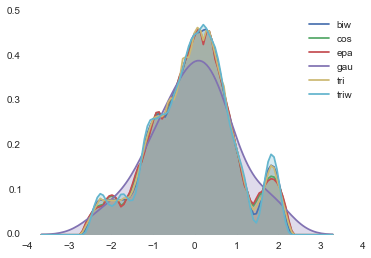

In [21]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel = kern, label=kern,shade=True)

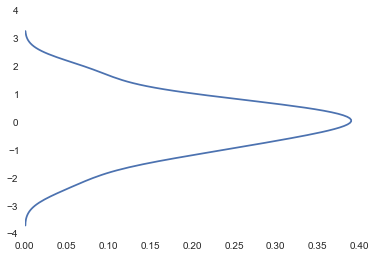

In [23]:
sns.kdeplot(dataset,vertical=True)

In [ ]:
#cumulative distribution function (CDF)

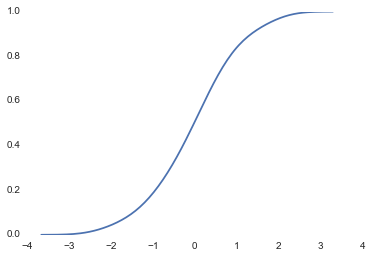

In [24]:
sns.kdeplot(dataset,cumulative = True)

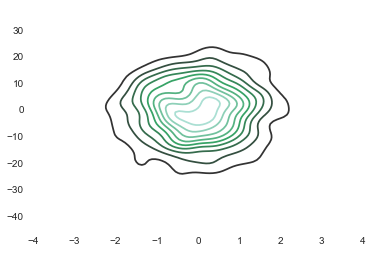

In [25]:
#multivariate density estimation
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)
           #uses seaborn with a pandas dataframe

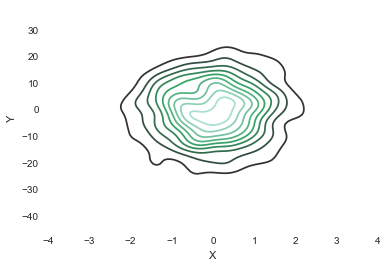

In [26]:
sns.kdeplot(dframe.X,dframe.Y)
#let's you pass two vectors separately

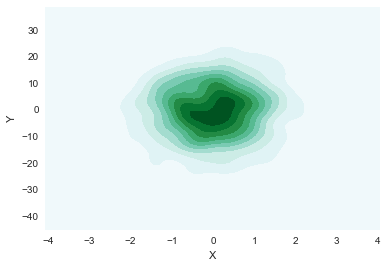

In [27]:
sns.kdeplot(dframe.X,dframe.Y,shade=True) 

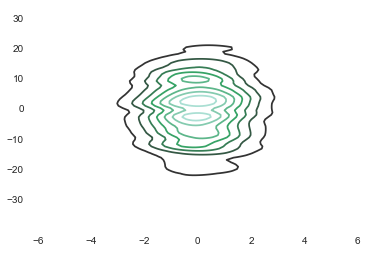

In [28]:
sns.kdeplot(dframe,bw=1)
#changes the bandwidth

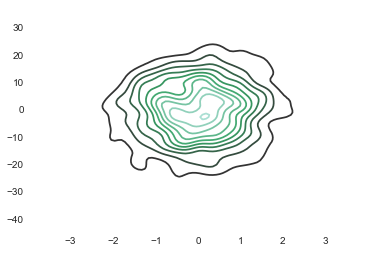

In [29]:
sns.kdeplot(dframe,bw='silverman')

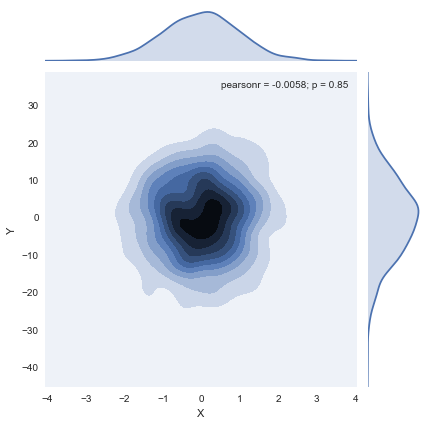

In [30]:
#kde joint plot
sns.jointplot('X','Y',dframe,kind='kde')